In [ ]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import tensorflow as tf
#import tensorflow.keras.backend as K
#from sklearn.metrics import confusion_matrix
from keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
#from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import MaxPool2D

In [ ]:
np.random.seed(0)

In [ ]:
#!wget https://www.kaggle.com/datasets/harshart/balanced-plant-dataset/download?datasetVersionNumber=3
!wget https://www.kaggle.com/datasets/51260b678151e12968d53b127102f01ccd04411d4c11fd5e3dfbb3ff6ef2aeb0
!unzip /content/archive.zip?dl=0

--2023-09-30 14:59:02--  https://www.kaggle.com/datasets/51260b678151e12968d53b127102f01ccd04411d4c11fd5e3dfbb3ff6ef2aeb0
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘51260b678151e12968d53b127102f01ccd04411d4c11fd5e3dfbb3ff6ef2aeb0’

51260b678151e12968d     [ <=>                ]   8.73K  --.-KB/s    in 0.04s   

2023-09-30 14:59:03 (234 KB/s) - ‘51260b678151e12968d53b127102f01ccd04411d4c11fd5e3dfbb3ff6ef2aeb0’ saved [8943]

unzip:  cannot find or open /content/archive.zip?dl=0, /content/archive.zip?dl=0.zip or /content/archive.zip?dl=0.ZIP.

No zipfiles found.


In [ ]:
from google.colab import files #add .json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
import zipfile
import os
from kaggle.cli import main
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d harshart/balanced-plant-dataset

100% 1.17G/1.17G [00:49<00:00, 29.4MB/s]
100% 1.17G/1.17G [00:49<00:00, 25.1MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('balanced-plant-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCED)"

train_dir = data_dir + "/Training/Strawberry"
valid_dir = data_dir + "/Testing/Strawberry"
#diseases = os.listdir('/tmp/Dataset alpha/Training/')
#healthe = os.listdir('/tmp/Dataset alpha/Training/healthy')

In [ ]:
train_healthy_strawberry_dir = '/tmp/DS MINI PROJECT DATASET(BALANCED)/Training/Strawberry/Strawberry___healthy'
train_disease_dir = '/tmp/DS MINI PROJECT DATASET(BALANCED)/Training/Strawberry/Strawberry___Leaf_scorch'

valid_healthy_strawberry_dir = '/tmp//Testing/Strawberry/Strawberry___healthy'
valid_disease_dir = '/tmp/Dataset alpha/Testing/Strawberry/Strawberry___Leaf_scorch'
#valid_main = '/tmp/Dataset alpha/Valid/healthy/Strawberry___healthy' + '/tmp/Dataset alpha/valid/disease/Strawberry___Leaf_scorch'

In [ ]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
#datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(batch_size = 32,
                                                     directory = train_dir,
                                                     shuffle= True,
                                                     target_size = (128 , 128),
                                                    class_mode  = "categorical")

valid_it = datagen.flow_from_directory(batch_size = 32,
                                                     directory = valid_dir,
                                                     shuffle= True,
                                                     target_size = (128, 128),
                                                    class_mode  = "categorical")

FileNotFoundError: ignored

In [ ]:
target_names=train_it.class_indices
print(target_names);print()
print('len(target_names',len(target_names))

{'Strawberry___Leaf_scorch': 0, 'Strawberry___healthy': 1}

len(target_names 2


In [ ]:
# define cnn model
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [ ]:
model = define_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
225/225 [==============================] - 21s 85ms/step - loss: 0.7066 - accuracy: 0.9764 - val_loss: 0.0122 - val_accuracy: 0.9967
Epoch 2/10
225/225 [==============================] - 17s 74ms/step - loss: 7.7001e-05 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9967
Epoch 3/10
225/225 [==============================] - 16s 69ms/step - loss: 1.3974e-05 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9944
Epoch 4/10
225/225 [==============================] - 15s 68ms/step - loss: 5.4431e-06 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 0.9944
Epoch 5/10
225/225 [==============================] - 15s 69ms/step - loss: 4.4546e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9944
Epoch 6/10
225/225 [==============================] - 16s 71ms/step - loss: 3.8544e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9944
Epoch 7/10
225/225 [==============================] - 15s 68ms/step - loss: 3.3548e-06 - accuracy: 1.0000 - val_loss

75/75 [==============================] - 3s 41ms/step - loss: 0.0118 - accuracy: 0.9944
accuracy 99.44444298744202
CPU times: user 2min 55s, sys: 7.03 s, total: 3min 2s
Wall time: 2min 54s


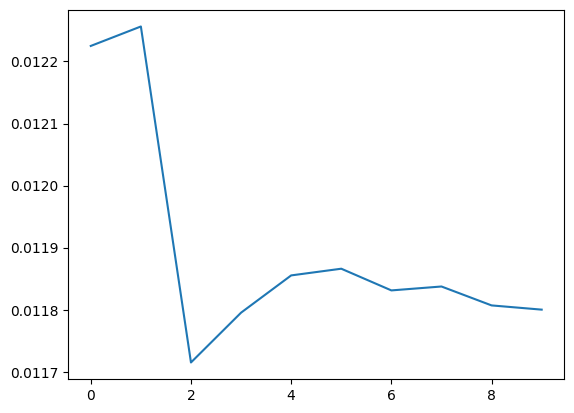

In [ ]:
plt.plot(history.history['val_loss'])

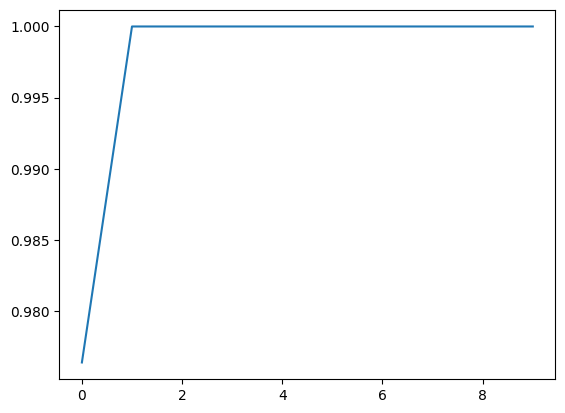

In [ ]:
plt.plot(history.history['accuracy'])

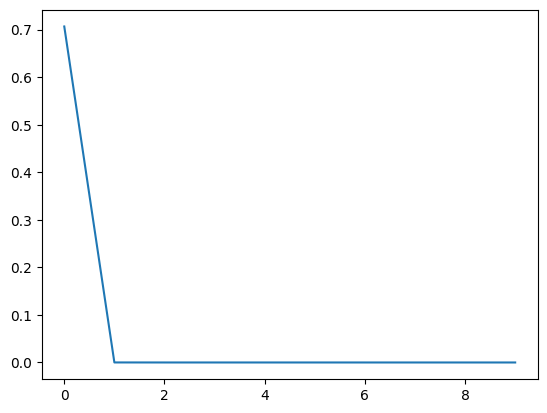

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
plot_accuracies(history)

TypeError: ignored

In [ ]:
#Cherry training and Validation

In [ ]:
data_dir = r"/tmp/Dataset alpha"
train_cherry_dir = data_dir + "/Training/cherry"
valid_cherry_dir = data_dir + "/Valid/cherry"
diseases = os.listdir('/tmp/Dataset alpha/Training/')
#healthe = os.listdir('/tmp/Dataset alpha/Training/healthy')

In [ ]:
train_healthy_cherry_dir = '/tmp/Dataset alpha/Training/cherry/Cherry_(including_sour)___healthy'
#/tmp/Dataset alpha/Training/cherry/Cherry_(including_sour)___Powdery_mildew
#/tmp/Dataset alpha/Training/cherry/Cherry_(including_sour)___healthy
train_disease_cherry_dir = '/tmp/Dataset alpha/Training/cherry/Cherry_(including_sour)___healthy'

valid_healthy_cherry_dir = '/tmp/Dataset alpha/Valid/cherry/Cherry_(including_sour)___healthy'
valid_disease_cherry_dir = '/tmp/Dataset alpha/Valid/Cherry_(including_sour)___Powdery_mildew'
#valid_main = '/tmp/Dataset alpha/Valid/healthy/Strawberry___healthy' + '/tmp/Dataset alpha/valid/disease/Strawberry___Leaf_scorch'

In [ ]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(batch_size = 32,
                                                     directory = train_cherry_dir,
                                                     shuffle= True,
                                                     target_size = (128 , 128),
                                                    class_mode  = "categorical")

valid_it = datagen.flow_from_directory(batch_size = 32,
                                                     directory = valid_cherry_dir,
                                                     shuffle= True,
                                                     target_size = (128, 128),
                                                    class_mode  = "categorical")

Found 7018 images belonging to 2 classes.
Found 1754 images belonging to 2 classes.
CPU times: user 232 ms, sys: 12.1 ms, total: 244 ms
Wall time: 258 ms


In [ ]:
target_names=train_it.class_indices
print(target_names);print()
print('len(target_names',len(target_names))

{'Cherry_(including_sour)___Powdery_mildew': 0, 'Cherry_(including_sour)___healthy': 1}

len(target_names 2


In [ ]:
# vgg16 with flatten
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [ ]:
model = define_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
220/220 [==============================] - 28s 79ms/step - loss: 0.3726 - accuracy: 0.9845 - val_loss: 0.0143 - val_accuracy: 0.9989
Epoch 2/10
220/220 [==============================] - 15s 68ms/step - loss: 2.2038e-05 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9989
Epoch 3/10
220/220 [==============================] - 15s 67ms/step - loss: 3.9255e-07 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9989
Epoch 4/10
220/220 [==============================] - 15s 69ms/step - loss: 2.3582e-07 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9989
Epoch 5/10
220/220 [==============================] - 14s 65ms/step - loss: 1.6502e-07 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9989
Epoch 6/10
220/220 [==============================] - 17s 78ms/step - loss: 1.2504e-07 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9989
Epoch 7/10
220/220 [==============================] - 15s 66ms/step - loss: 9.8141e-08 - accuracy: 1.0000 - val_loss

75/75 [==============================] - 3s 38ms/step - loss: 0.0111 - accuracy: 0.9989
accuracy 99.88597631454468
CPU times: user 2min 47s, sys: 8.69 s, total: 2min 56s
Wall time: 3min 2s


In [ ]:
from keras.layers.pooling.average_pooling2d import AveragePooling2D
# vgg16 with avgpooling
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelavg():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    #flat1 = Flatten()(model.layers[-1].output)
    avgpool1=AveragePooling2D(strides=2)(model.layers[-1].output)
    flat1 = Flatten()(avgpool1)

    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [ ]:
modelavg = define_modelavg()
modelavg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelavg.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = modelavg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = modelavg.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
220/220 [==============================] - 17s 71ms/step - loss: 0.1303 - accuracy: 0.9859 - val_loss: 0.0217 - val_accuracy: 0.9966
Epoch 2/10
220/220 [==============================] - 15s 68ms/step - loss: 3.0980e-05 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9966
Epoch 3/10
220/220 [==============================] - 16s 72ms/step - loss: 2.2186e-06 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9966
Epoch 4/10
220/220 [==============================] - 15s 69ms/step - loss: 1.7480e-06 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9966
Epoch 5/10
220/220 [==============================] - 15s 69ms/step - loss: 1.4572e-06 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 0.9966
Epoch 6/10
220/220 [==============================] - 17s 77ms/step - loss: 1.2406e-06 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 0.9966
Epoch 7/10
220/220 [==============================] - 15s 69ms/step - loss: 1.0751e-06 - accuracy: 1.0000 - val_loss

75/75 [==============================] - 3s 40ms/step - loss: 0.0220 - accuracy: 0.9966
accuracy 99.65792298316956
CPU times: user 2min 46s, sys: 8.65 s, total: 2min 55s
Wall time: 3min 2s


In [ ]:

from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
# vgg16 with globalavgpooling
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelavg():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    #flat1 = Flatten()(model.layers[-1].output)
    avgpool1=GlobalAveragePooling2D()(model.layers[-1].output)
    #flat1 = Flatten()(avgpool1)

    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [ ]:
modelavg = define_modelavg()
modelavg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelavg.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = modelavg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = modelavg.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
220/220 [==============================] - 16s 67ms/step - loss: 0.0716 - accuracy: 0.9850 - val_loss: 0.0134 - val_accuracy: 0.9966
Epoch 2/10
220/220 [==============================] - 15s 68ms/step - loss: 2.3596e-04 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9966
Epoch 3/10
220/220 [==============================] - 15s 67ms/step - loss: 9.5601e-05 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9966
Epoch 4/10
220/220 [==============================] - 15s 66ms/step - loss: 4.9292e-05 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9966
Epoch 5/10
220/220 [==============================] - 15s 69ms/step - loss: 2.7298e-05 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9977
Epoch 6/10
220/220 [==============================] - 19s 84ms/step - loss: 1.8848e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9977
Epoch 7/10
220/220 [==============================] - 15s 66ms/step - loss: 1.3442e-05 - accuracy: 1.0000 - val_loss

75/75 [==============================] - 3s 40ms/step - loss: 0.0103 - accuracy: 0.9977
accuracy 99.77195262908936
CPU times: user 2min 43s, sys: 7.79 s, total: 2min 50s
Wall time: 2min 57s


Trying Different Dense layer

In [ ]:
# define cnn model
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(64, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [ ]:
model = define_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
225/225 [==============================] - 32s 92ms/step - loss: 0.2920 - accuracy: 0.9778 - val_loss: 0.0162 - val_accuracy: 0.9933
Epoch 2/10
225/225 [==============================] - 17s 75ms/step - loss: 5.2898e-04 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9956
Epoch 3/10
225/225 [==============================] - 16s 72ms/step - loss: 7.5968e-05 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9956
Epoch 4/10
225/225 [==============================] - 19s 83ms/step - loss: 3.7770e-05 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9956
Epoch 5/10
225/225 [==============================] - 16s 72ms/step - loss: 2.4612e-05 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9956
Epoch 6/10
225/225 [==============================] - 17s 76ms/step - loss: 1.8054e-05 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9956
Epoch 7/10
225/225 [==============================] - 17s 74ms/step - loss: 1.3919e-05 - accuracy: 1.0000 - val_loss

75/75 [==============================] - 3s 42ms/step - loss: 0.0138 - accuracy: 0.9944
accuracy 99.44444298744202
CPU times: user 3min 5s, sys: 10.2 s, total: 3min 16s
Wall time: 3min 32s


In [ ]:
# define cnn model
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(32, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [ ]:
model = define_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
225/225 [==============================] - 18s 73ms/step - loss: 0.1948 - accuracy: 0.9860 - val_loss: 0.0144 - val_accuracy: 0.9967
Epoch 2/10
225/225 [==============================] - 19s 83ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0146 - val_accuracy: 0.9956
Epoch 3/10
225/225 [==============================] - 16s 73ms/step - loss: 2.8542e-04 - accuracy: 0.9997 - val_loss: 0.0153 - val_accuracy: 0.9978
Epoch 4/10
225/225 [==============================] - 17s 74ms/step - loss: 2.4161e-05 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9978
Epoch 5/10
225/225 [==============================] - 16s 73ms/step - loss: 5.8514e-07 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9978
Epoch 6/10
225/225 [==============================] - 16s 70ms/step - loss: 5.2535e-07 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9978
Epoch 7/10
225/225 [==============================] - 18s 81ms/step - loss: 4.7633e-07 - accuracy: 1.0000 - val_loss: 0.

75/75 [==============================] - 3s 41ms/step - loss: 0.0122 - accuracy: 0.9978
accuracy 99.77777600288391
CPU times: user 2min 59s, sys: 9.01 s, total: 3min 8s
Wall time: 3min 8s


In [ ]:
# define cnn model
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [ ]:
model = define_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
225/225 [==============================] - 17s 72ms/step - loss: 0.1308 - accuracy: 0.9803 - val_loss: 0.0090 - val_accuracy: 0.9944
Epoch 2/10
225/225 [==============================] - 17s 75ms/step - loss: 5.7256e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9978
Epoch 3/10
225/225 [==============================] - 16s 73ms/step - loss: 2.4107e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9989
Epoch 4/10
225/225 [==============================] - 16s 72ms/step - loss: 1.4748e-04 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9989
Epoch 5/10
225/225 [==============================] - 18s 81ms/step - loss: 9.7704e-05 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 0.9989
Epoch 6/10
225/225 [==============================] - 16s 73ms/step - loss: 6.8778e-05 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9978
Epoch 7/10
225/225 [==============================] - 17s 74ms/step - loss: 5.0877e-05 - accuracy: 1.0000 - val_loss

75/75 [==============================] - 3s 43ms/step - loss: 0.0053 - accuracy: 0.9978
accuracy 99.77777600288391
CPU times: user 2min 59s, sys: 8.98 s, total: 3min 8s
Wall time: 3min


In [ ]:
# define cnn model
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [ ]:
model = define_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
225/225 [==============================] - 18s 76ms/step - loss: 0.2606 - accuracy: 0.9797 - val_loss: 0.0113 - val_accuracy: 0.9978
Epoch 2/10
225/225 [==============================] - 16s 72ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.0092 - val_accuracy: 0.9967
Epoch 3/10
225/225 [==============================] - 17s 76ms/step - loss: 4.8108e-05 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9967
Epoch 4/10
225/225 [==============================] - 18s 81ms/step - loss: 1.1672e-05 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9967
Epoch 5/10
225/225 [==============================] - 18s 82ms/step - loss: 9.4292e-06 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 0.9967
Epoch 6/10
225/225 [==============================] - 16s 73ms/step - loss: 8.0141e-06 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9967
Epoch 7/10
225/225 [==============================] - 21s 91ms/step - loss: 7.0599e-06 - accuracy: 1.0000 - val_loss: 0.

75/75 [==============================] - 3s 42ms/step - loss: 0.0098 - accuracy: 0.9967
accuracy 99.6666669845581
CPU times: user 3min, sys: 9.14 s, total: 3min 10s
Wall time: 3min 33s


In [ ]:
from keras.layers import MaxPool2D
from keras.layers import IntegerLookup

In [ ]:
#model 1
model1 = models.Sequential()
model1 = Sequential()
#model1.add(Conv2D(filters=4,kernel_size=(3,3),padding="same", activation="relu", input_shape=(224,224,3)))
model1.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model1.add(Dropout(0.4))

#model1.add(Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model1.add(Dropout(0.5))

flat1 = Flatten()(model1.layers[-1].output)
class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(2, activation='softmax')(class1)
model1 = Model(inputs=model1.inputs, outputs=output)



In [ ]:
#model1 = define_model()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12_input (InputLayer  [(None, 128, 128, 3)]    0         
 )                                                               
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                           

In [ ]:
%%time
#model 1 trained on strawberry dataset
epochsteps=len(train_it);epochs =5;valsteps=len(valid_it)
# fit model
history = model1.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=5, verbose=1)
_, acc = model1.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/5
225/225 [==============================] - 15s 68ms/step - loss: 0.3076 - accuracy: 0.9439 - val_loss: 0.0517 - val_accuracy: 0.9911
Epoch 2/5
225/225 [==============================] - 14s 63ms/step - loss: 0.0280 - accuracy: 0.9936 - val_loss: 0.0273 - val_accuracy: 0.9922
Epoch 3/5
225/225 [==============================] - 13s 60ms/step - loss: 0.0253 - accuracy: 0.9936 - val_loss: 0.0249 - val_accuracy: 0.9933
Epoch 4/5
225/225 [==============================] - 14s 62ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.0171 - val_accuracy: 0.9944
Epoch 5/5
57/57 [==============================] - 3s 46ms/step - loss: 0.0590 - accuracy: 0.9856
accuracy 98.55555295944214
CPU times: user 1min 20s, sys: 2.75 s, total: 1min 23s
Wall time: 1min 38s


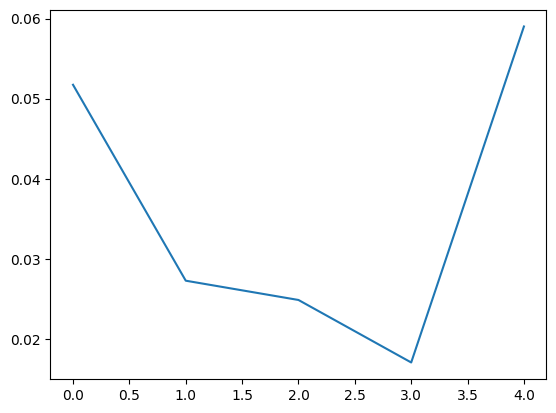

In [ ]:
plt.plot(history.history['val_loss'])

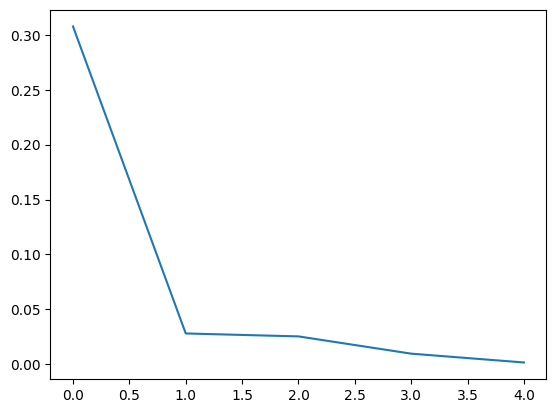

In [ ]:
plt.plot(history.history['loss'])

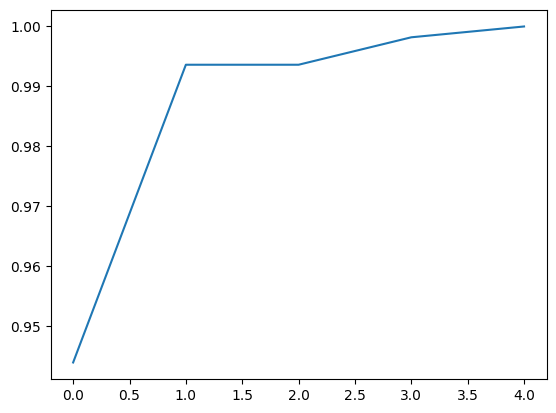

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
%%time
#model 1 trained on cherry dataset
epochsteps=len(train_it);epochs =5;valsteps=len(valid_it)
# fit model
history = model1.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=5, verbose=1)
_, acc = model1.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/5
220/220 [==============================] - 13s 58ms/step - loss: 1.0536e-05 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9977
Epoch 2/5
220/220 [==============================] - 13s 59ms/step - loss: 9.1546e-06 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9977
Epoch 3/5
220/220 [==============================] - 13s 59ms/step - loss: 7.8309e-06 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 0.9989
Epoch 4/5
220/220 [==============================] - 13s 60ms/step - loss: 6.7001e-06 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9977
Epoch 5/5
55/55 [==============================] - 2s 41ms/step - loss: 0.0060 - accuracy: 0.9989
accuracy 99.88597631454468
CPU times: user 1min 14s, sys: 2.75 s, total: 1min 17s
Wall time: 1min 7s


In [ ]:
print(valsteps)

55


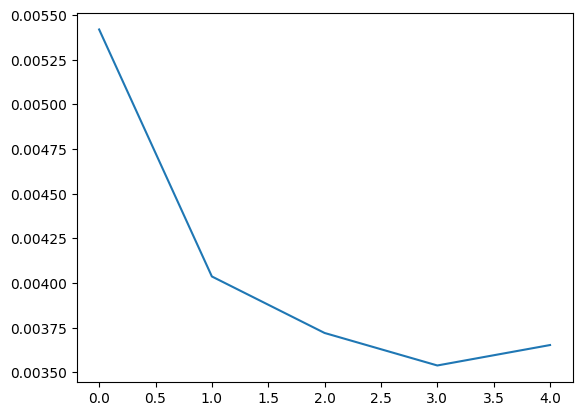

In [ ]:
plt.plot(history.history['val_loss'])

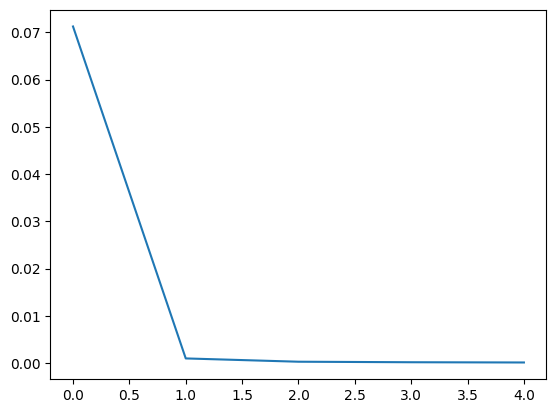

In [ ]:
plt.plot(history.history['loss'])

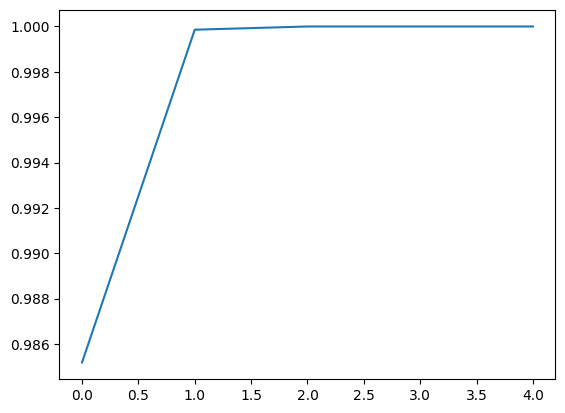

In [ ]:
plt.plot(history.history['accuracy'])

Training and Validation for peach

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_peach_dir = data_dir + "/Training/Peach"
valid_peach_dir = data_dir + "/Testing/Peach"
diseases = os.listdir('/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)/Training/')
#healthe = os.listdir('/tmp/Dataset alpha/Training/healthy')

In [ ]:
train_healthy_peach_dir = '/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)/Training/Peach/Peach___healthy'
train_disease_peach_dir = '/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)/Training/Peach/Peach___Bacterial_spot'

valid_healthy_peach_dir = '/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)/Testing/Peach/Peach___healthy'
valid_disease_peach_dir = '/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)/Testing/Peach/Peach___Bacterial_spot'

In [ ]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(batch_size = 32,
                                                     directory = train_peach_dir,
                                                     shuffle= True,
                                                     target_size = (128 , 128),
                                                    class_mode  = "categorical")

valid_it = datagen.flow_from_directory(batch_size = 32,
                                                     directory = valid_peach_dir,
                                                     shuffle= True,
                                                     target_size = (128, 128),
                                                    class_mode  = "categorical")

Found 3566 images belonging to 2 classes.
Found 891 images belonging to 2 classes.
CPU times: user 69.2 ms, sys: 6.79 ms, total: 76 ms
Wall time: 80.2 ms


In [ ]:
target_names=train_it.class_indices
print(target_names);print()
print('len(target_names)= ',len(target_names))

{'Peach___Bacterial_spot': 0, 'Peach___healthy': 1}

len(target_names)=  2


In [ ]:
# VGG16 with flatten layer
# Accuracy = 99.55 with 6 units
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_model():
    # load model
    model_peach = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_peach.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model_peach.layers[-1].output)
    class1 = Dense(6, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model_peach = Model(inputs=model_peach.inputs, outputs=output)
    return model_peach

In [ ]:
model_peach = define_model()
model_peach.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_peach.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                            

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model_peach.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_peach.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
112/112 [==============================] - 21s 91ms/step - loss: 0.1958 - accuracy: 0.9361 - val_loss: 0.0474 - val_accuracy: 0.9832
Epoch 2/10
112/112 [==============================] - 8s 70ms/step - loss: 0.0178 - accuracy: 0.9952 - val_loss: 0.0469 - val_accuracy: 0.9843
Epoch 3/10
112/112 [==============================] - 9s 76ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.0343 - val_accuracy: 0.9921
Epoch 4/10
112/112 [==============================] - 7s 66ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0286 - val_accuracy: 0.9944
Epoch 5/10
112/112 [==============================] - 8s 73ms/step - loss: 8.5297e-04 - accuracy: 0.9997 - val_loss: 0.0299 - val_accuracy: 0.9955
Epoch 6/10
112/112 [==============================] - 9s 78ms/step - loss: 6.3405e-04 - accuracy: 0.9997 - val_loss: 0.0314 - val_accuracy: 0.9955
Epoch 7/10
112/112 [==============================] - 7s 66ms/step - loss: 5.1008e-04 - accuracy: 0.9997 - val_loss: 0.0312 - val_acc

75/75 [==============================] - 2s 20ms/step - loss: 0.0326 - accuracy: 0.9955
accuracy 99.55106377601624
CPU times: user 1min 30s, sys: 5.06 s, total: 1min 35s
Wall time: 1min 34s


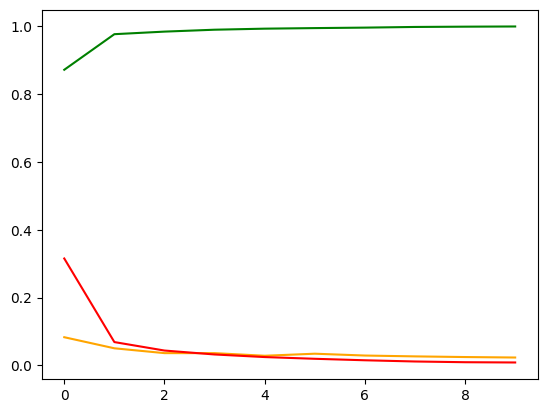

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

In [ ]:
#VGG16 with average pooling layer
#accuray = 98.76
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_peachmodelavg():
    # load model
    model_p = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_p.layers:
        layer.trainable = False
    # add new classifier layers
    #flat1 = Flatten()(model.layers[-1].output)
    avgpool1=GlobalAveragePooling2D()(model_p.layers[-1].output)
    #flat1 = Flatten()(avgpool1)

    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model_p = Model(inputs=model_p.inputs, outputs=output)
    return model_p

ModuleNotFoundError: ignored

In [ ]:
modelavg_p = define_peachmodelavg()
modelavg_p.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelavg_p.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
%%time
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = modelavg_p.fit(train_it, steps_per_epoch=epochsteps, validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = modelavg_p.evaluate(valid_it, steps=75, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
112/112 [==============================] - 10s 75ms/step - loss: 0.3153 - accuracy: 0.8716 - val_loss: 0.0833 - val_accuracy: 0.9697
Epoch 2/10
112/112 [==============================] - 8s 70ms/step - loss: 0.0689 - accuracy: 0.9764 - val_loss: 0.0506 - val_accuracy: 0.9843
Epoch 3/10
112/112 [==============================] - 9s 77ms/step - loss: 0.0440 - accuracy: 0.9840 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 4/10
112/112 [==============================] - 8s 68ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0363 - val_accuracy: 0.9865
Epoch 5/10
112/112 [==============================] - 8s 71ms/step - loss: 0.0248 - accuracy: 0.9927 - val_loss: 0.0286 - val_accuracy: 0.9888
Epoch 6/10
112/112 [==============================] - 8s 73ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.0347 - val_accuracy: 0.9843
Epoch 7/10
112/112 [==============================] - 8s 69ms/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.0292 - val_accuracy: 0.986

75/75 [==============================] - 2s 20ms/step - loss: 0.0234 - accuracy: 0.9877
accuracy 98.76543283462524
CPU times: user 1min 26s, sys: 4.54 s, total: 1min 30s
Wall time: 1min 34s


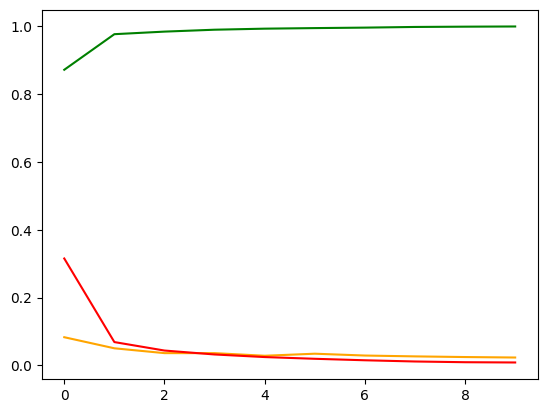

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

In [ ]:
# CNN model from scratch
#flatten
#ACCURACY - 99.66
def define_p():
  peach = models.Sequential()
  peach = Sequential()

  peach.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  peach.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  peach.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  peach.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  flat1 = Flatten()(peach.layers[-1].output)
  class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(2, activation='softmax')(class1)
  peach = Model(inputs=peach.inputs, outputs=output)
  return peach

In [ ]:
peach = define_p()
peach.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
peach.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer  [(None, 128, 128, 3)]     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                           

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = peach.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = peach.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
112/112 [==============================] - 10s 63ms/step - loss: 1.0454 - accuracy: 0.7919 - val_loss: 0.1564 - val_accuracy: 0.9551
Epoch 2/10
112/112 [==============================] - 6s 52ms/step - loss: 0.1454 - accuracy: 0.9801 - val_loss: 0.0964 - val_accuracy: 0.9776
Epoch 3/10
112/112 [==============================] - 7s 61ms/step - loss: 0.0628 - accuracy: 0.9882 - val_loss: 0.0274 - val_accuracy: 0.9899
Epoch 4/10
112/112 [==============================] - 6s 53ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0425 - val_accuracy: 0.9888
Epoch 5/10
112/112 [==============================] - 7s 58ms/step - loss: 0.0255 - accuracy: 0.9950 - val_loss: 0.0113 - val_accuracy: 0.9955
Epoch 6/10
112/112 [==============================] - 6s 52ms/step - loss: 0.0217 - accuracy: 0.9961 - val_loss: 0.0099 - val_accuracy: 0.9955
Epoch 7/10
112/112 [==============================] - 7s 59ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0236 - val_accuracy: 0.992

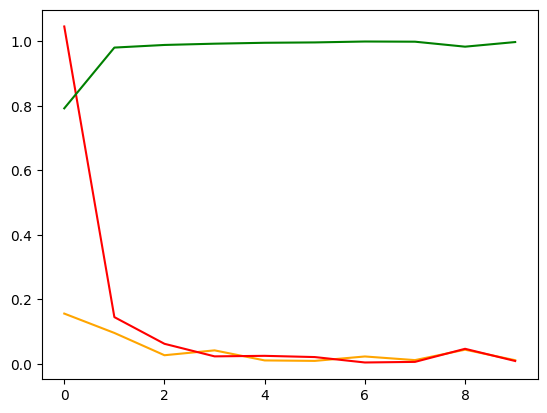

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

In [ ]:
#average pooling
#accuracy = 99.32
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

def define_p_a():
  peach_a = models.Sequential()
  peach_a = Sequential()

  peach_a.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  peach_a.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  peach_a.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  peach_a.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  avg1 = GlobalAveragePooling2D()(peach_a.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(2, activation='softmax')(class1)
  peach_a = Model(inputs=peach_a.inputs, outputs=output)
  return peach_a

In [ ]:
peach_a = define_p_a()
peach_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
peach_a.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 128, 128, 3)]    0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_2   (None, 32)               0   

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = peach_a.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = peach_a.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
112/112 [==============================] - 8s 58ms/step - loss: 0.3331 - accuracy: 0.9260 - val_loss: 0.0776 - val_accuracy: 0.9675
Epoch 2/10
112/112 [==============================] - 7s 59ms/step - loss: 0.0638 - accuracy: 0.9790 - val_loss: 0.0525 - val_accuracy: 0.9787
Epoch 3/10
112/112 [==============================] - 7s 63ms/step - loss: 0.0586 - accuracy: 0.9770 - val_loss: 0.0327 - val_accuracy: 0.9888
Epoch 4/10
112/112 [==============================] - 7s 62ms/step - loss: 0.0486 - accuracy: 0.9832 - val_loss: 0.0228 - val_accuracy: 0.9910
Epoch 5/10
112/112 [==============================] - 7s 62ms/step - loss: 0.0443 - accuracy: 0.9843 - val_loss: 0.1029 - val_accuracy: 0.9641
Epoch 6/10
112/112 [==============================] - 7s 64ms/step - loss: 0.0536 - accuracy: 0.9823 - val_loss: 0.0326 - val_accuracy: 0.9888
Epoch 7/10
112/112 [==============================] - 6s 56ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0277 - val_accuracy: 0.9888

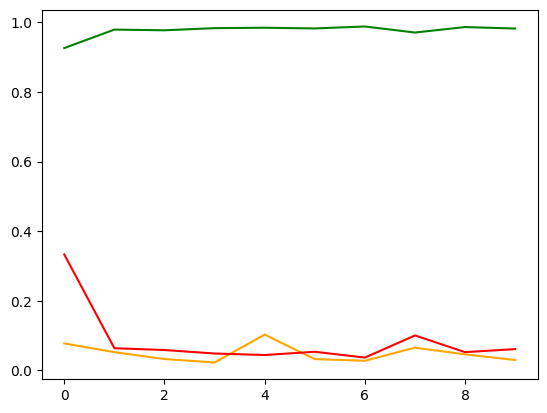

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

# **Bell Pepper**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCED)"
train_bp_dir = data_dir + "/Training/Bell Pepper"
test_bp_dir = data_dir + "/Testing/Bell Pepper"
diseases = os.listdir('/tmp/DS MINI PROJECT DATASET(BALANCED)/Training/')
#healthe = os.listdir('/tmp/Dataset alpha/Training/healthy')

In [ ]:
train_healthy_bp_dir = train_bp_dir + '/Pepper,_bell___healthy'
train_disease_bp_dir = train_bp_dir + '/Pepper,_bell___Bacterial_spot'

valid_healthy_bp_dir = test_bp_dir + '/Pepper,_bell___healthy'
valid_disease_bp_dir = test_bp_dir + '/Pepper,_bell___Bacterial_spot'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = train_bp_dir,
                                        shuffle= True,
                                        target_size = (128 , 128),
                                        class_mode  = "categorical"
                                        )

valid_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = test_bp_dir,
                                        shuffle= True,
                                        target_size = (128, 128),
                                        class_mode  = "categorical"
                                        )

Found 3901 images belonging to 2 classes.
Found 975 images belonging to 2 classes.


vgg16 model

In [ ]:
#flatten
#accidentally ran with strawberry dataset and optimized for that :)
####gives 100% accuracy on strawberry (just tweeked the first dense layer units between 5-8 to get optimal accuracy)

from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelflatten():
    # load model
    model_strawberry = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_strawberry.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model_strawberry.layers[-1].output)
    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model_strawberry = Model(inputs=model_strawberry.inputs, outputs=output)
    return model_strawberry

model_strawberry = define_modelflatten()
model_strawberry.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_strawberry.summary()

epochsteps=len(train_it);epochs=10;valsteps=len(valid_it)
# fit model
history = model_strawberry.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_strawberry.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
#flatten
### tested with 6-10 units with 8 giving the highest accuracy at 97.23

from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelflatten():
    # load model
    model_bp = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_bp.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model_bp.layers[-1].output)
    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model_bp = Model(inputs=model_bp.inputs, outputs=output)
    return model_bp

In [ ]:
model_bp = define_modelflatten()
model_bp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_bp.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs=10;valsteps=len(valid_it)
# fit model
history = model_bp.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_bp.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
122/122 [==============================] - 12s 86ms/step - loss: 0.6836 - accuracy: 0.8313 - val_loss: 0.2390 - val_accuracy: 0.8862
Epoch 2/10
122/122 [==============================] - 10s 82ms/step - loss: 0.2016 - accuracy: 0.9433 - val_loss: 0.2029 - val_accuracy: 0.9385
Epoch 3/10
122/122 [==============================] - 10s 82ms/step - loss: 0.1385 - accuracy: 0.9569 - val_loss: 0.1680 - val_accuracy: 0.9610
Epoch 4/10
122/122 [==============================] - 10s 82ms/step - loss: 0.0796 - accuracy: 0.9777 - val_loss: 0.1579 - val_accuracy: 0.9631
Epoch 5/10
122/122 [==============================] - 10s 84ms/step - loss: 0.0646 - accuracy: 0.9818 - val_loss: 0.2370 - val_accuracy: 0.9508
Epoch 6/10
122/122 [==============================] - 10s 79ms/step - loss: 0.0469 - accuracy: 0.9872 - val_loss: 0.2178 - val_accuracy: 0.9641
Epoch 7/10
122/122 [==============================] - 10s 82ms/step - loss: 0.0468 - accuracy: 0.9882 - val_loss: 0.1804 - val_accuracy:

In [ ]:
# average pooling

from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

def define_modelavg():
    # load model
    model_bp_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_bp_avg.layers:
        layer.trainable = False
    # add new classifier layers
    #flat1 = Flatten()(model.layers[-1].output)
    avgpool1 = GlobalAveragePooling2D()(model_bp_avg.layers[-1].output)
    #flat1 = Flatten()(avgpool1)

    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model_bp_avg = Model(inputs=model_bp_avg.inputs, outputs=output)
    return model_bp_avg

In [ ]:
model_bp_avg = define_modelavg()
model_bp_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_bp_avg.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model_bp_avg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_bp_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
122/122 [==============================] - 11s 78ms/step - loss: 0.4364 - accuracy: 0.8236 - val_loss: 0.2231 - val_accuracy: 0.9138
Epoch 2/10
122/122 [==============================] - 10s 81ms/step - loss: 0.1824 - accuracy: 0.9249 - val_loss: 0.1646 - val_accuracy: 0.9415
Epoch 3/10
122/122 [==============================] - 10s 82ms/step - loss: 0.1314 - accuracy: 0.9531 - val_loss: 0.1438 - val_accuracy: 0.9446
Epoch 4/10
122/122 [==============================] - 10s 80ms/step - loss: 0.1016 - accuracy: 0.9641 - val_loss: 0.1155 - val_accuracy: 0.9590
Epoch 5/10
122/122 [==============================] - 10s 83ms/step - loss: 0.0803 - accuracy: 0.9728 - val_loss: 0.1145 - val_accuracy: 0.9631
Epoch 6/10
122/122 [==============================] - 10s 78ms/step - loss: 0.0633 - accuracy: 0.9821 - val_loss: 0.1063 - val_accuracy: 0.9621
Epoch 7/10
122/122 [==============================] - 10s 82ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.1071 - val_accuracy:

cnn from scratch

In [ ]:
#flatten


def define_bp():
  bell_pepper = models.Sequential()
  bell_pepper = Sequential()

  bell_pepper.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  # bell_pepper.add(Conv2D(filters=56, kernel_size=(3,3), padding="same", activation="relu"))
  bell_pepper.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # bell_pepper.add(Dropout(0.4))

  bell_pepper.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  bell_pepper.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # bell_pepper.add(Dropout(0.5))

  flat1 = Flatten()(bell_pepper.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(2, activation='softmax')(class1)
  bell_pepper = Model(inputs=bell_pepper.inputs, outputs=output)
  return bell_pepper


In [ ]:
bell_pepper = define_bp()
bell_pepper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bell_pepper.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45_input (InputLayer  [(None, 128, 128, 3)]    0         
 )                                                               
                                                                 
 conv2d_45 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                          

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = bell_pepper.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = bell_pepper.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
122/122 [==============================] - 11s 77ms/step - loss: 5.4498 - accuracy: 0.8623 - val_loss: 0.2238 - val_accuracy: 0.9241
Epoch 2/10
122/122 [==============================] - 14s 116ms/step - loss: 0.0767 - accuracy: 0.9739 - val_loss: 0.1307 - val_accuracy: 0.9610
Epoch 3/10
122/122 [==============================] - 10s 82ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.1380 - val_accuracy: 0.9651
Epoch 4/10
122/122 [==============================] - 15s 124ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1569 - val_accuracy: 0.9610
Epoch 5/10
122/122 [==============================] - 8s 69ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 0.9641
Epoch 6/10
122/122 [==============================] - 9s 76ms/step - loss: 4.5873e-04 - accuracy: 1.0000 - val_loss: 0.1608 - val_accuracy: 0.9621
Epoch 7/10
122/122 [==============================] - 12s 96ms/step - loss: 2.9544e-04 - accuracy: 1.0000 - val_loss: 0.1649 - val_a

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

In [ ]:
#average pooling
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

def define_bp_a():
  bell_pepper_a = models.Sequential()
  bell_pepper_a = Sequential()

  bell_pepper_a.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  # bell_pepper_a.add(Conv2D(filters=56, kernel_size=(3,3), padding="same", activation="relu"))
  bell_pepper_a.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # bell_pepper_a.add(Dropout(0.4))

  bell_pepper_a.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  bell_pepper_a.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  # bell_pepper_a.add(Dropout(0.5))

  avg1 = GlobalAveragePooling2D()(bell_pepper_a.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(2, activation='softmax')(class1)
  bell_pepper_a = Model(inputs=bell_pepper_a.inputs, outputs=output)
  return bell_pepper_a

In [ ]:
bell_pepper_a = define_bp_a()
bell_pepper_a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bell_pepper_a.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 128, 128, 3)]    0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 32)               0     

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = bell_pepper_a.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = bell_pepper_a.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
122/122 [==============================] - 19s 66ms/step - loss: 0.5604 - accuracy: 0.7921 - val_loss: 0.3099 - val_accuracy: 0.8667
Epoch 2/10
122/122 [==============================] - 8s 68ms/step - loss: 0.3109 - accuracy: 0.8616 - val_loss: 0.2427 - val_accuracy: 0.9036
Epoch 3/10
122/122 [==============================] - 7s 54ms/step - loss: 0.2553 - accuracy: 0.8928 - val_loss: 0.2266 - val_accuracy: 0.9097
Epoch 4/10
122/122 [==============================] - 7s 54ms/step - loss: 0.2038 - accuracy: 0.9200 - val_loss: 0.1642 - val_accuracy: 0.9436
Epoch 5/10
122/122 [==============================] - 7s 61ms/step - loss: 0.1765 - accuracy: 0.9300 - val_loss: 0.1695 - val_accuracy: 0.9251
Epoch 6/10
122/122 [==============================] - 7s 54ms/step - loss: 0.1679 - accuracy: 0.9354 - val_loss: 0.1296 - val_accuracy: 0.9569
Epoch 7/10
122/122 [==============================] - 7s 56ms/step - loss: 0.1661 - accuracy: 0.9351 - val_loss: 0.1823 - val_accuracy: 0.920

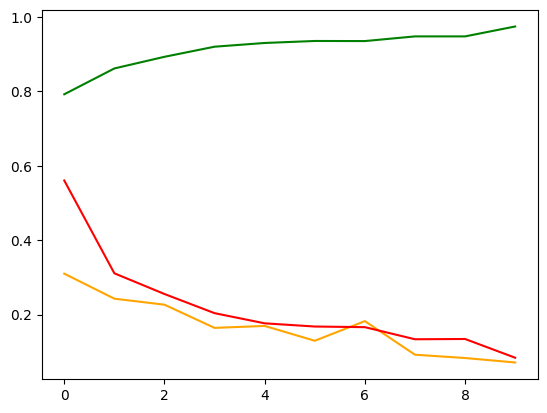

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

# **Grape**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_g_dir = data_dir + "/Training/Grape"
test_g_dir = data_dir + "/Testing/Grape"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = train_g_dir,
                                        shuffle= True,
                                        target_size = (128 , 128),
                                        class_mode  = "categorical"
                                        )

valid_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = test_g_dir,
                                        shuffle= True,
                                        target_size = (128, 128),
                                        class_mode  = "categorical"
                                        )

Found 7222 images belonging to 4 classes.
Found 1805 images belonging to 4 classes.


In [ ]:
# acc = 95.90 & 99.64 tested with 8 units
# val_acc = 96.84 & acc = 99.74 tested with 10 units
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelflatten():
    # load model
    model_Grape = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_Grape.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model_Grape.layers[-1].output)
    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_Grape = Model(inputs=model_Grape.inputs, outputs=output)
    return model_Grape

In [ ]:
model_Grape = define_modelflatten()
model_Grape.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_Grape.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs=10;valsteps=len(valid_it)
# fit model
history = model_Grape.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_Grape.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)


Epoch 1/10
226/226 [==============================] - 19s 79ms/step - loss: 0.8596 - accuracy: 0.7279 - val_loss: 0.4757 - val_accuracy: 0.9313
Epoch 2/10
226/226 [==============================] - 17s 75ms/step - loss: 0.4103 - accuracy: 0.9442 - val_loss: 0.3838 - val_accuracy: 0.9568
Epoch 3/10
226/226 [==============================] - 17s 74ms/step - loss: 0.3001 - accuracy: 0.9657 - val_loss: 0.3122 - val_accuracy: 0.9601
Epoch 4/10
226/226 [==============================] - 17s 75ms/step - loss: 0.2305 - accuracy: 0.9790 - val_loss: 0.2425 - val_accuracy: 0.9668
Epoch 5/10
226/226 [==============================] - 17s 75ms/step - loss: 0.1747 - accuracy: 0.9870 - val_loss: 0.1980 - val_accuracy: 0.9712
Epoch 6/10
226/226 [==============================] - 17s 74ms/step - loss: 0.1397 - accuracy: 0.9914 - val_loss: 0.1990 - val_accuracy: 0.9679
Epoch 7/10
226/226 [==============================] - 17s 74ms/step - loss: 0.1121 - accuracy: 0.9928 - val_loss: 0.2695 - val_accuracy:

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

Avg Pooling for Grape

In [ ]:
# acc = 96.17 with 8 units
# val_acc = 95.84 & acc = 97.45 with 10 units


#from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

def define_modelavg():
    # load model
    model_g_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_g_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_g_avg.layers[-1].output)

    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_g_avg = Model(inputs=model_g_avg.inputs, outputs=output)
    return model_g_avg

In [ ]:
model_g_avg = define_modelavg()
model_g_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_g_avg.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model_g_avg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_g_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
226/226 [==============================] - 18s 75ms/step - loss: 0.8899 - accuracy: 0.7257 - val_loss: 0.2833 - val_accuracy: 0.8859
Epoch 2/10
226/226 [==============================] - 19s 82ms/step - loss: 0.2023 - accuracy: 0.9204 - val_loss: 0.1915 - val_accuracy: 0.9274
Epoch 3/10
226/226 [==============================] - 17s 73ms/step - loss: 0.1446 - accuracy: 0.9424 - val_loss: 0.1636 - val_accuracy: 0.9324
Epoch 4/10
226/226 [==============================] - 17s 74ms/step - loss: 0.1159 - accuracy: 0.9547 - val_loss: 0.1476 - val_accuracy: 0.9413
Epoch 5/10
226/226 [==============================] - 17s 75ms/step - loss: 0.1004 - accuracy: 0.9603 - val_loss: 0.1370 - val_accuracy: 0.9507
Epoch 6/10
226/226 [==============================] - 19s 83ms/step - loss: 0.0951 - accuracy: 0.9637 - val_loss: 0.1404 - val_accuracy: 0.9402
Epoch 7/10
226/226 [==============================] - 17s 74ms/step - loss: 0.0830 - accuracy: 0.9672 - val_loss: 0.1127 - val_accuracy:

In [ ]:
#flatten
#acc = 26.59 with 16
#acc = 97.78 with 1 more conv2D
def define_g():
  grape = models.Sequential()
  grape = Sequential()

  grape.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  grape.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.4))

  grape.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  grape.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.5))

  grape.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  grape.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  flat1 = Flatten()(grape.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(4, activation='softmax')(class1)
  grape = Model(inputs=grape.inputs, outputs=output)
  return grape

In [ ]:
grape = define_g()
grape.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
grape.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                          

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = grape.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = grape.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
226/226 [==============================] - 15s 66ms/step - loss: 0.3678 - accuracy: 0.8830 - val_loss: 0.3568 - val_accuracy: 0.9141
Epoch 2/10
226/226 [==============================] - 15s 64ms/step - loss: 0.3216 - accuracy: 0.9140 - val_loss: 0.3349 - val_accuracy: 0.8975
Epoch 3/10
226/226 [==============================] - 15s 66ms/step - loss: 0.2456 - accuracy: 0.9280 - val_loss: 0.1974 - val_accuracy: 0.9396
Epoch 4/10
226/226 [==============================] - 15s 64ms/step - loss: 0.1153 - accuracy: 0.9625 - val_loss: 0.1001 - val_accuracy: 0.9634
Epoch 5/10
226/226 [==============================] - 15s 68ms/step - loss: 0.0615 - accuracy: 0.9799 - val_loss: 0.1019 - val_accuracy: 0.9673
Epoch 6/10
226/226 [==============================] - 15s 65ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0998 - val_accuracy: 0.9729
Epoch 7/10
226/226 [==============================] - 15s 66ms/step - loss: 0.0142 - accuracy: 0.9963 - val_loss: 0.1065 - val_accuracy:

In [ ]:
#average pooling
#accuracy 90.63 with 16
#accuracy 95.56 with 16 with 1 more convo


#from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

def define_g_a():
  grape_avg = models.Sequential()
  grape_avg = Sequential()

  grape_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  grape_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape_avg.add(Dropout(0.4))

  grape_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  grape_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape_avg.add(Dropout(0.5))

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(grape_avg.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(4, activation='softmax')(class1)
  grape_avg = Model(inputs=grape_avg.inputs, outputs=output)
  return grape_avg

In [ ]:
grape_avg = define_g_a()
grape_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
grape_avg.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                          

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = grape_avg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = grape_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
226/226 [==============================] - 19s 79ms/step - loss: 0.9293 - accuracy: 0.7058 - val_loss: 0.4892 - val_accuracy: 0.8116
Epoch 2/10
226/226 [==============================] - 14s 64ms/step - loss: 0.5090 - accuracy: 0.7978 - val_loss: 0.4195 - val_accuracy: 0.8327
Epoch 3/10
226/226 [==============================] - 17s 76ms/step - loss: 0.4577 - accuracy: 0.8204 - val_loss: 0.3994 - val_accuracy: 0.8377
Epoch 4/10
226/226 [==============================] - 15s 65ms/step - loss: 0.4103 - accuracy: 0.8399 - val_loss: 0.3760 - val_accuracy: 0.8499
Epoch 5/10
226/226 [==============================] - 14s 64ms/step - loss: 0.3701 - accuracy: 0.8549 - val_loss: 0.3290 - val_accuracy: 0.8720
Epoch 6/10
226/226 [==============================] - 14s 63ms/step - loss: 0.3386 - accuracy: 0.8704 - val_loss: 0.3271 - val_accuracy: 0.8809
Epoch 7/10
226/226 [==============================] - 14s 63ms/step - loss: 0.3180 - accuracy: 0.8793 - val_loss: 0.2761 - val_accuracy:

# **Corn**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_g_dir = data_dir + "/Training/Corn"
test_g_dir = data_dir + "/Testing/Corn"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = train_g_dir,
                                        shuffle= True,
                                        target_size = (128 , 128),
                                        class_mode  = "categorical"
                                        )

valid_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = test_g_dir,
                                        shuffle= True,
                                        target_size = (128, 128),
                                        class_mode  = "categorical"
                                        )

Found 7316 images belonging to 4 classes.
Found 1829 images belonging to 4 classes.


**VGG16 with flatten**

In [ ]:
# accuracy = 95.02

from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelflatten():
    # load model
    model_corn = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_corn.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model_corn.layers[-1].output)
    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_corn = Model(inputs=model_corn.inputs, outputs=output)
    return model_corn

In [ ]:
model_corn = define_modelflatten()
model_corn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_corn.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                            

In [ ]:
epochsteps=len(train_it);epochs=10;valsteps=len(valid_it)
# fit model
history = model_corn.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_corn.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
229/229 [==============================] - 30s 87ms/step - loss: 0.5491 - accuracy: 0.7869 - val_loss: 0.2445 - val_accuracy: 0.8989
Epoch 2/10
229/229 [==============================] - 17s 73ms/step - loss: 0.1567 - accuracy: 0.9440 - val_loss: 0.2004 - val_accuracy: 0.9322
Epoch 3/10
229/229 [==============================] - 17s 75ms/step - loss: 0.0918 - accuracy: 0.9643 - val_loss: 0.2785 - val_accuracy: 0.9464
Epoch 4/10
229/229 [==============================] - 17s 75ms/step - loss: 0.0705 - accuracy: 0.9750 - val_loss: 0.2606 - val_accuracy: 0.9535
Epoch 5/10
229/229 [==============================] - 17s 72ms/step - loss: 0.0438 - accuracy: 0.9841 - val_loss: 0.2675 - val_accuracy: 0.9541
Epoch 6/10
229/229 [==============================] - 18s 80ms/step - loss: 0.0379 - accuracy: 0.9865 - val_loss: 0.2756 - val_accuracy: 0.9579
Epoch 7/10
229/229 [==============================] - 17s 75ms/step - loss: 0.0296 - accuracy: 0.9895 - val_loss: 0.4087 - val_accuracy:

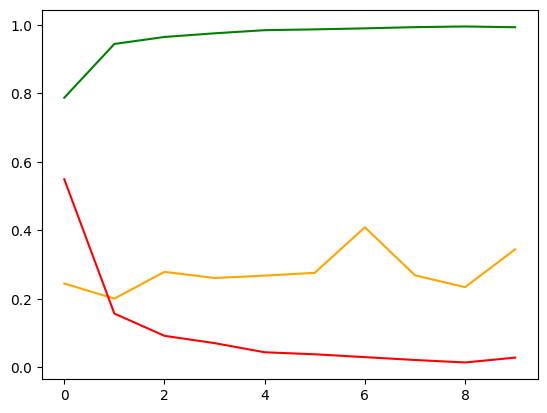

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**VGG16 with Average Pooling**

In [ ]:
# accuracy = 96.06

# from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

def define_modelavg():
    # load model
    model_c_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_c_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_c_avg.layers[-1].output)

    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_c_avg = Model(inputs=model_c_avg.inputs, outputs=output)
    return model_c_avg

In [ ]:
model_c_avg = define_modelavg()
model_c_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_c_avg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model_c_avg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_c_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
229/229 [==============================] - 20s 77ms/step - loss: 0.3872 - accuracy: 0.8442 - val_loss: 0.2162 - val_accuracy: 0.9202
Epoch 2/10
229/229 [==============================] - 17s 76ms/step - loss: 0.1560 - accuracy: 0.9373 - val_loss: 0.1667 - val_accuracy: 0.9349
Epoch 3/10
229/229 [==============================] - 17s 73ms/step - loss: 0.1142 - accuracy: 0.9537 - val_loss: 0.1401 - val_accuracy: 0.9453
Epoch 4/10
229/229 [==============================] - 17s 73ms/step - loss: 0.0912 - accuracy: 0.9638 - val_loss: 0.1252 - val_accuracy: 0.9552
Epoch 5/10
229/229 [==============================] - 17s 75ms/step - loss: 0.0787 - accuracy: 0.9699 - val_loss: 0.1215 - val_accuracy: 0.9541
Epoch 6/10
229/229 [==============================] - 17s 76ms/step - loss: 0.0675 - accuracy: 0.9735 - val_loss: 0.1161 - val_accuracy: 0.9590
Epoch 7/10
229/229 [==============================] - 18s 79ms/step - loss: 0.0608 - accuracy: 0.9769 - val_loss: 0.1133 - val_accuracy:

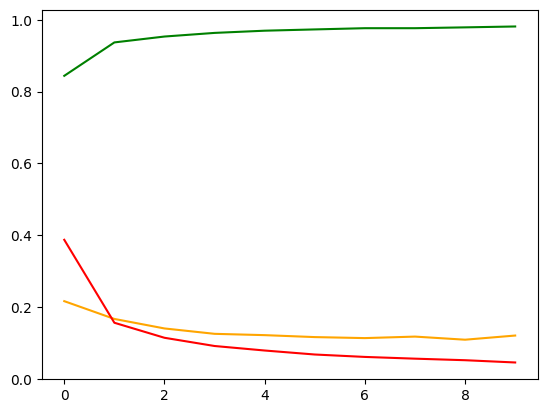

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**CNN model with flatten**

In [ ]:
# accuracy = 96.82

def define_c():
  corn = models.Sequential()
  corn = Sequential()

  corn.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  corn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.4))

  corn.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  corn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.5))

  corn.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  corn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  flat1 = Flatten()(corn.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(4, activation='softmax')(class1)
  corn = Model(inputs=corn.inputs, outputs=output)
  return corn

In [ ]:
corn = define_c()
corn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
corn.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7_input (InputLayer  [(None, 128, 128, 3)]     0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                           

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = corn.fit(train_it, steps_per_epoch = epochsteps, validation_data = valid_it, validation_steps = valsteps, epochs = 10, verbose = 1)
_, acc = corn.evaluate(valid_it, steps = valsteps, verbose = 1)
print('accuracy',acc * 100.0)

Epoch 1/10
229/229 [==============================] - 18s 60ms/step - loss: 2.1690 - accuracy: 0.7407 - val_loss: 0.2086 - val_accuracy: 0.9207
Epoch 2/10
229/229 [==============================] - 14s 62ms/step - loss: 0.1689 - accuracy: 0.9374 - val_loss: 0.1782 - val_accuracy: 0.9459
Epoch 3/10
229/229 [==============================] - 13s 56ms/step - loss: 0.1040 - accuracy: 0.9609 - val_loss: 0.1294 - val_accuracy: 0.9530
Epoch 4/10
229/229 [==============================] - 13s 57ms/step - loss: 0.0632 - accuracy: 0.9792 - val_loss: 0.1297 - val_accuracy: 0.9590
Epoch 5/10
229/229 [==============================] - 13s 58ms/step - loss: 0.0492 - accuracy: 0.9820 - val_loss: 0.1194 - val_accuracy: 0.9606
Epoch 6/10
229/229 [==============================] - 13s 56ms/step - loss: 0.0481 - accuracy: 0.9832 - val_loss: 0.2126 - val_accuracy: 0.9524
Epoch 7/10
229/229 [==============================] - 14s 59ms/step - loss: 0.0496 - accuracy: 0.9818 - val_loss: 0.1385 - val_accuracy:

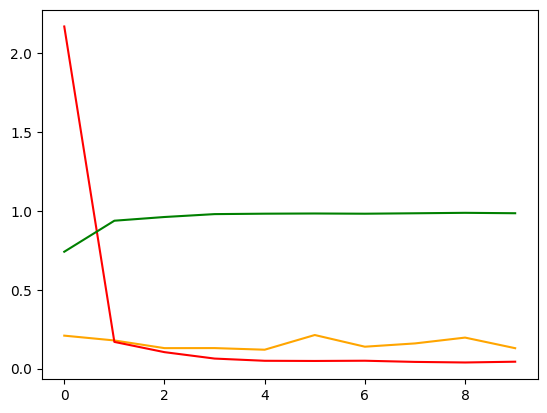

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**CNN model with Average Pooling**

In [ ]:
# accuracy = 90.21 in 10th epoch but it was 94.86 in 9th epoch with dense = 16


def define_c_a():
  corn_avg = models.Sequential()
  corn_avg = Sequential()

  corn_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  corn_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  corn_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  corn_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(corn_avg.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(4, activation='softmax')(class1)
  corn_avg = Model(inputs=corn_avg.inputs, outputs=output)
  return corn_avg

In [ ]:
corn_avg = define_c_a()
corn_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
corn_avg.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                           

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = corn_avg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = corn_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
229/229 [==============================] - 15s 61ms/step - loss: 0.6230 - accuracy: 0.7592 - val_loss: 0.3408 - val_accuracy: 0.8660
Epoch 2/10
229/229 [==============================] - 15s 65ms/step - loss: 0.2670 - accuracy: 0.8939 - val_loss: 0.2259 - val_accuracy: 0.9131
Epoch 3/10
229/229 [==============================] - 14s 62ms/step - loss: 0.1899 - accuracy: 0.9277 - val_loss: 0.1837 - val_accuracy: 0.9273
Epoch 4/10
229/229 [==============================] - 13s 56ms/step - loss: 0.1728 - accuracy: 0.9341 - val_loss: 0.2020 - val_accuracy: 0.9191
Epoch 5/10
229/229 [==============================] - 13s 58ms/step - loss: 0.1402 - accuracy: 0.9475 - val_loss: 0.1708 - val_accuracy: 0.9360
Epoch 6/10
229/229 [==============================] - 13s 56ms/step - loss: 0.1425 - accuracy: 0.9438 - val_loss: 0.1845 - val_accuracy: 0.9273
Epoch 7/10
229/229 [==============================] - 13s 58ms/step - loss: 0.1230 - accuracy: 0.9541 - val_loss: 0.1293 - val_accuracy:

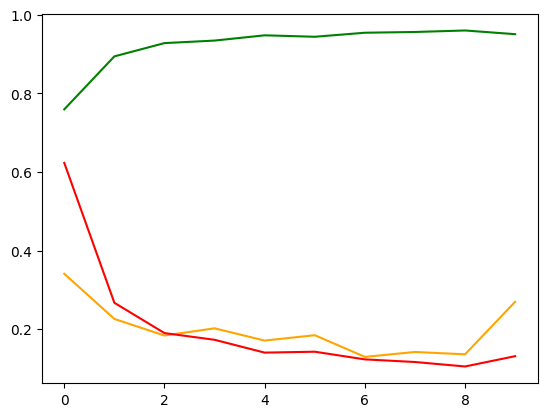

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

# **Tomato (Incomplete)**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_t_dir = data_dir + "/Training/Tomato"
test_t_dir = data_dir + "/Testing/Tomato"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = train_t_dir,
                                        shuffle= True,
                                        target_size = (128 , 128),
                                        class_mode  = "categorical"
                                        )

valid_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = test_t_dir,
                                        shuffle= True,
                                        target_size = (128, 128),
                                        class_mode  = "categorical"
                                        )

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


VGG16 with flatten

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelflatten():
    # load model
    model_Tomato = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_Tomato.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model_Tomato.layers[-1].output)
    class1 = Dense(32, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(10, activation='softmax')(class1)
    # define new model
    model_Tomato = Model(inputs=model_Tomato.inputs, outputs=output)
    return model_Tomato

In [ ]:
model_Tomato = define_modelflatten()
model_Tomato.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_Tomato.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs=10;valsteps=len(valid_it)
# fit model
history = model_Tomato.fit(train_it, steps_per_epoch=epochsteps, validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_Tomato.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
574/574 [==============================] - 45s 75ms/step - loss: 1.5146 - accuracy: 0.5119 - val_loss: 1.0252 - val_accuracy: 0.6159
Epoch 2/10
574/574 [==============================] - 44s 76ms/step - loss: 0.7701 - accuracy: 0.7237 - val_loss: 0.7343 - val_accuracy: 0.7655
Epoch 3/10
574/574 [==============================] - 43s 76ms/step - loss: 0.4930 - accuracy: 0.8250 - val_loss: 0.5612 - val_accuracy: 0.8009
Epoch 4/10
574/574 [==============================] - 46s 80ms/step - loss: 0.3506 - accuracy: 0.8769 - val_loss: 0.5715 - val_accuracy: 0.8209
Epoch 5/10
574/574 [==============================] - 44s 76ms/step - loss: 0.2543 - accuracy: 0.9082 - val_loss: 0.6441 - val_accuracy: 0.8273
Epoch 6/10
574/574 [==============================] - 46s 79ms/step - loss: 0.2135 - accuracy: 0.9228 - val_loss: 0.5322 - val_accuracy: 0.8388
Epoch 7/10
574/574 [==============================] - 42s 74ms/step - loss: 0.1771 - accuracy: 0.9368 - val_loss: 0.6030 - val_accuracy:

VGG16 with average pooling

In [ ]:
from keras.applications.vgg16 import VGG16
def define_modelavg():
    # load model
    model_t_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_t_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_t_avg.layers[-1].output)

    class1 = Dense(32, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(10, activation='softmax')(class1)
    # define new model
    model_t_avg = Model(inputs=model_t_avg.inputs, outputs=output)
    return model_t_avg

In [ ]:
model_t_avg = define_modelavg()
model_t_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_t_avg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model_t_avg.fit(train_it, steps_per_epoch=epochsteps, validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_t_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
574/574 [==============================] - 45s 77ms/step - loss: 1.1748 - accuracy: 0.6415 - val_loss: 0.6234 - val_accuracy: 0.7847
Epoch 2/10
574/574 [==============================] - 44s 77ms/step - loss: 0.4726 - accuracy: 0.8372 - val_loss: 0.4562 - val_accuracy: 0.8432
Epoch 3/10
574/574 [==============================] - 44s 77ms/step - loss: 0.3524 - accuracy: 0.8782 - val_loss: 0.4440 - val_accuracy: 0.8532
Epoch 4/10
574/574 [==============================] - 43s 74ms/step - loss: 0.2862 - accuracy: 0.9024 - val_loss: 0.3956 - val_accuracy: 0.8724
Epoch 5/10
574/574 [==============================] - 44s 76ms/step - loss: 0.2470 - accuracy: 0.9158 - val_loss: 0.3596 - val_accuracy: 0.8840
Epoch 6/10
574/574 [==============================] - 43s 76ms/step - loss: 0.2185 - accuracy: 0.9253 - val_loss: 0.3400 - val_accuracy: 0.8875
Epoch 7/10
574/574 [==============================] - 46s 79ms/step - loss: 0.1899 - accuracy: 0.9355 - val_loss: 0.3599 - val_accuracy:

# **Potato**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_potato_dir = data_dir + "/Training/Potato"
test_potato_dir = data_dir + "/Testing/Potato"
#diseases = os.listdir('/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)/Training/')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = train_potato_dir,
                                        shuffle= True,
                                        target_size = (128 , 128),
                                        class_mode  = "categorical"
                                        )

valid_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = test_potato_dir,
                                        shuffle= True,
                                        target_size = (128, 128),
                                        class_mode  = "categorical"
                                        )

Found 5702 images belonging to 3 classes.
Found 1426 images belonging to 3 classes.


**VGG 16 with Flatten**

10 unit dense layer training accuracy=97.475%

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelflatten():
    # load model
    model_potato = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_potato.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model_potato.layers[-1].output)
    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(3, activation='softmax')(class1)
    # define new model
    model_potato = Model(inputs=model_potato.inputs, outputs=output)
    return model_potato

In [ ]:
model_potato = define_modelflatten()
model_potato.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_potato.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
epochsteps=len(train_it);epochs=10;valsteps=len(valid_it)
# fit model
history = model_potato.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_potato.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
179/179 [==============================] - 26s 87ms/step - loss: 0.5078 - accuracy: 0.8530 - val_loss: 0.2430 - val_accuracy: 0.9390
Epoch 2/10
179/179 [==============================] - 14s 76ms/step - loss: 0.1295 - accuracy: 0.9523 - val_loss: 0.1567 - val_accuracy: 0.9432
Epoch 3/10
179/179 [==============================] - 14s 78ms/step - loss: 0.0928 - accuracy: 0.9714 - val_loss: 0.1530 - val_accuracy: 0.9614
Epoch 4/10
179/179 [==============================] - 14s 79ms/step - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.1156 - val_accuracy: 0.9565
Epoch 5/10
179/179 [==============================] - 14s 81ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.1422 - val_accuracy: 0.9579
Epoch 6/10
179/179 [==============================] - 14s 75ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.2330 - val_accuracy: 0.9537
Epoch 7/10
179/179 [==============================] - 16s 87ms/step - loss: 0.0373 - accuracy: 0.9867 - val_loss: 0.1397 - val_accuracy:

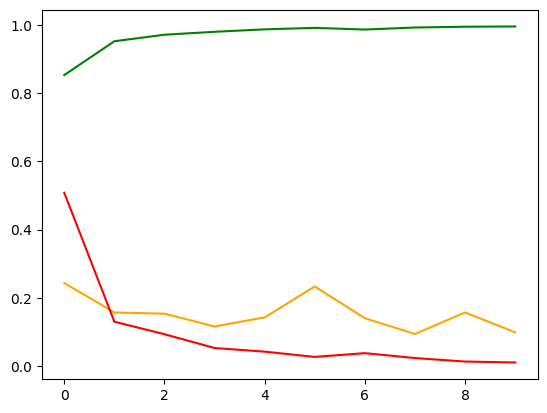

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**VGG16 with Average Pooling**

10 unit Dense Layer accuracy=97.125

In [ ]:
#from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def define_modelavg():
    # load model
    model_potato_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_potato_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_potato_avg.layers[-1].output)

    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(3, activation='softmax')(class1)
    # define new model
    model_potato_avg = Model(inputs=model_potato_avg.inputs, outputs=output)
    return model_potato_avg


In [ ]:
model_potato_avg = define_modelavg()
model_potato_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_potato_avg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model_potato_avg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_potato_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
179/179 [==============================] - 18s 89ms/step - loss: 0.7174 - accuracy: 0.7888 - val_loss: 0.2399 - val_accuracy: 0.9053
Epoch 2/10
179/179 [==============================] - 14s 79ms/step - loss: 0.1976 - accuracy: 0.9248 - val_loss: 0.1455 - val_accuracy: 0.9418
Epoch 3/10
179/179 [==============================] - 15s 83ms/step - loss: 0.1344 - accuracy: 0.9500 - val_loss: 0.1384 - val_accuracy: 0.9467
Epoch 4/10
179/179 [==============================] - 17s 93ms/step - loss: 0.1086 - accuracy: 0.9618 - val_loss: 0.0969 - val_accuracy: 0.9649
Epoch 5/10
179/179 [==============================] - 14s 78ms/step - loss: 0.0836 - accuracy: 0.9698 - val_loss: 0.0915 - val_accuracy: 0.9649
Epoch 6/10
179/179 [==============================] - 15s 82ms/step - loss: 0.0737 - accuracy: 0.9730 - val_loss: 0.0803 - val_accuracy: 0.9684
Epoch 7/10
179/179 [==============================] - 14s 77ms/step - loss: 0.0623 - accuracy: 0.9805 - val_loss: 0.0765 - val_accuracy:

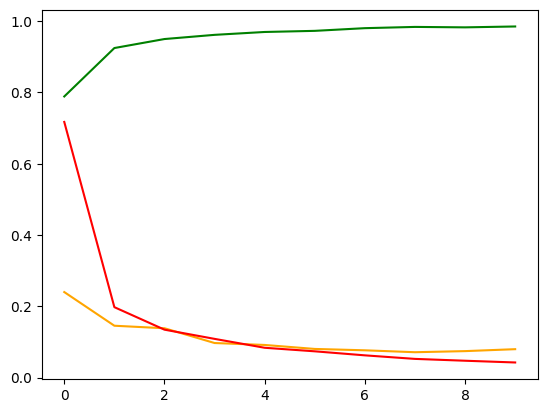

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**CNN with Flatten**

ConvMax ConvMax ConvMax with Flatten accuracy= 92.706

---


ConvMax ConvMax with Flatten accuracy=89.48

In [ ]:
def define_potato():
  potato = models.Sequential()
  potato = Sequential()

  potato.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  potato.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.4))

  potato.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  potato.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.5))

  potato.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  potato.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  flat1 = Flatten()(potato.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(3, activation='softmax')(class1)
  potato = Model(inputs=potato.inputs, outputs=output)
  return potato

In [ ]:
potato = define_potato()
potato.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
potato.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer  [(None, 128, 128, 3)]     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                           

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = potato.fit(train_it, steps_per_epoch=epochsteps, validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = potato.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)


Epoch 1/10
179/179 [==============================] - 16s 69ms/step - loss: 2.1608 - accuracy: 0.8011 - val_loss: 0.2701 - val_accuracy: 0.9046
Epoch 2/10
179/179 [==============================] - 12s 67ms/step - loss: 0.1338 - accuracy: 0.9518 - val_loss: 0.2710 - val_accuracy: 0.9229
Epoch 3/10
179/179 [==============================] - 13s 72ms/step - loss: 0.0917 - accuracy: 0.9665 - val_loss: 0.1597 - val_accuracy: 0.9460
Epoch 4/10
179/179 [==============================] - 12s 69ms/step - loss: 0.0782 - accuracy: 0.9714 - val_loss: 0.0907 - val_accuracy: 0.9607
Epoch 5/10
179/179 [==============================] - 12s 67ms/step - loss: 0.0653 - accuracy: 0.9770 - val_loss: 0.1998 - val_accuracy: 0.9509
Epoch 6/10
179/179 [==============================] - 13s 73ms/step - loss: 0.0429 - accuracy: 0.9849 - val_loss: 0.1468 - val_accuracy: 0.9572
Epoch 7/10
179/179 [==============================] - 13s 71ms/step - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.1276 - val_accuracy:

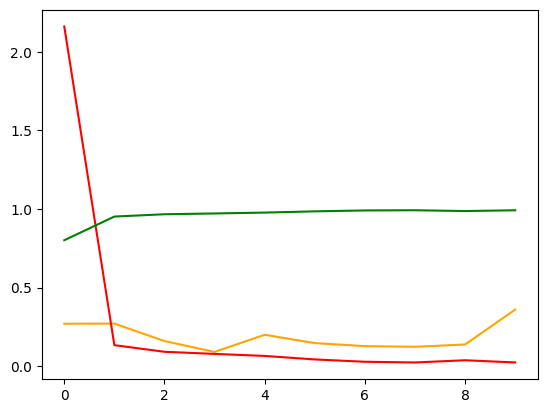

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

In [ ]:
def define_potato():
  potato = models.Sequential()
  potato = Sequential()

  potato.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  potato.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.4))

  potato.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  potato.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.5))

  #potato.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  #potato.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  flat1 = Flatten()(potato.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(3, activation='softmax')(class1)
  potato = Model(inputs=potato.inputs, outputs=output)
  return potato

In [ ]:
potato = define_potato()
potato.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
potato.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer  [(None, 128, 128, 3)]     0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                           

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = potato.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = potato.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
179/179 [==============================] - 14s 69ms/step - loss: 4.9226 - accuracy: 0.7273 - val_loss: 0.4440 - val_accuracy: 0.8268
Epoch 2/10
179/179 [==============================] - 12s 68ms/step - loss: 0.3022 - accuracy: 0.8736 - val_loss: 0.3150 - val_accuracy: 0.8752
Epoch 3/10
179/179 [==============================] - 13s 71ms/step - loss: 0.1824 - accuracy: 0.9160 - val_loss: 0.3490 - val_accuracy: 0.8597
Epoch 4/10
179/179 [==============================] - 12s 69ms/step - loss: 0.1444 - accuracy: 0.9335 - val_loss: 0.3408 - val_accuracy: 0.8808
Epoch 5/10
179/179 [==============================] - 12s 68ms/step - loss: 0.1061 - accuracy: 0.9491 - val_loss: 0.2672 - val_accuracy: 0.8941
Epoch 6/10
179/179 [==============================] - 13s 70ms/step - loss: 0.0812 - accuracy: 0.9583 - val_loss: 0.3244 - val_accuracy: 0.8794
Epoch 7/10
179/179 [==============================] - 13s 72ms/step - loss: 0.1662 - accuracy: 0.9348 - val_loss: 0.3321 - val_accuracy:

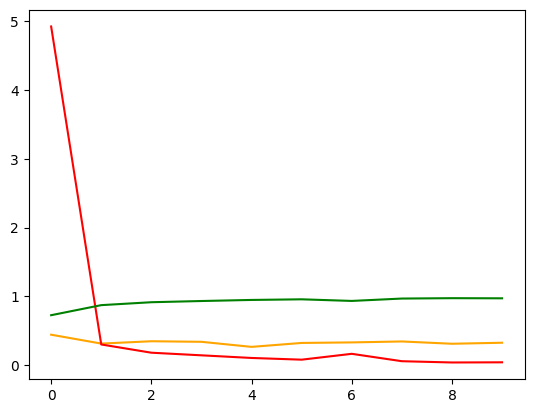

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**CNN with Average Pooling**

ConvMax ConvMax ConvMax with avgpool accuracy=99.02

In [ ]:
def define_potato_avg():
  potato_avg = models.Sequential()
  potato_avg = Sequential()

  potato_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  potato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.4))

  potato_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  potato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.5))

  potato_avg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  potato_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(potato_avg.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(3, activation='softmax')(class1)
  potato_avg = Model(inputs=potato_avg.inputs, outputs=output)
  return potato_avg

In [ ]:
potato_avg = define_potato_avg()
potato_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
potato_avg.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                           

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = potato_avg.fit(train_it, steps_per_epoch=epochsteps, validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = potato_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
179/179 [==============================] - 14s 67ms/step - loss: 0.8300 - accuracy: 0.7543 - val_loss: 0.4013 - val_accuracy: 0.8569
Epoch 2/10
179/179 [==============================] - 12s 68ms/step - loss: 0.1966 - accuracy: 0.9286 - val_loss: 0.1097 - val_accuracy: 0.9593
Epoch 3/10
179/179 [==============================] - 13s 72ms/step - loss: 0.1229 - accuracy: 0.9548 - val_loss: 0.0649 - val_accuracy: 0.9783
Epoch 4/10
179/179 [==============================] - 12s 67ms/step - loss: 0.1033 - accuracy: 0.9611 - val_loss: 0.1941 - val_accuracy: 0.9285
Epoch 5/10
179/179 [==============================] - 12s 69ms/step - loss: 0.0833 - accuracy: 0.9688 - val_loss: 0.0462 - val_accuracy: 0.9818
Epoch 6/10
179/179 [==============================] - 13s 71ms/step - loss: 0.0628 - accuracy: 0.9744 - val_loss: 0.0624 - val_accuracy: 0.9804
Epoch 7/10
179/179 [==============================] - 14s 76ms/step - loss: 0.0660 - accuracy: 0.9761 - val_loss: 0.0435 - val_accuracy:

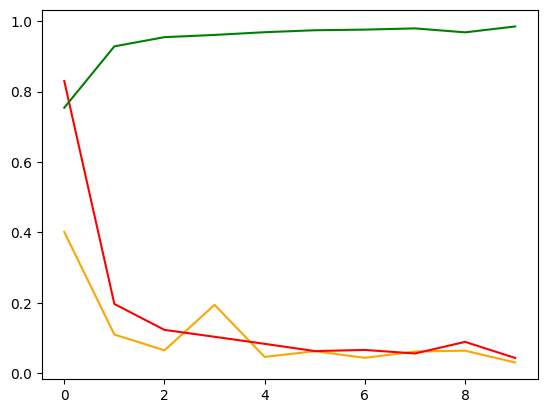

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

#**Apple**

In [ ]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_apple_dir = data_dir + "/Training/Apple"
test_apple_dir = data_dir + "/Testing/Apple"
#diseases = os.listdir('/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)/Training/')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]
train_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = train_apple_dir,
                                        shuffle= True,
                                        target_size = (128 , 128),
                                        class_mode  = "categorical"
                                        )

valid_it = datagen.flow_from_directory(
                                        batch_size = 32,
                                        directory = test_apple_dir,
                                        shuffle= True,
                                        target_size = (128, 128),
                                        class_mode  = "categorical"
                                        )

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


**VGG 16 with Flatten**

10 unit dense layer accuracy=97.38%

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelflatten():
    # load model
    model_apple = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_apple.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model_apple.layers[-1].output)
    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_apple = Model(inputs=model_apple.inputs, outputs=output)
    return model_apple

In [ ]:
model_apple = define_modelflatten()
model_apple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_apple.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs=10;valsteps=len(valid_it)
# fit model
history = model_apple.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_apple.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
243/243 [==============================] - 23s 86ms/step - loss: 0.6956 - accuracy: 0.8045 - val_loss: 0.2602 - val_accuracy: 0.9331
Epoch 2/10
243/243 [==============================] - 17s 69ms/step - loss: 0.1470 - accuracy: 0.9596 - val_loss: 0.1330 - val_accuracy: 0.9712
Epoch 3/10
243/243 [==============================] - 17s 69ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.1399 - val_accuracy: 0.9722
Epoch 4/10
243/243 [==============================] - 16s 68ms/step - loss: 0.0578 - accuracy: 0.9857 - val_loss: 0.1634 - val_accuracy: 0.9609
Epoch 5/10
243/243 [==============================] - 17s 70ms/step - loss: 0.0268 - accuracy: 0.9927 - val_loss: 0.1283 - val_accuracy: 0.9738
Epoch 6/10
243/243 [==============================] - 17s 68ms/step - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.1326 - val_accuracy: 0.9794
Epoch 7/10
243/243 [==============================] - 17s 68ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.1595 - val_accuracy:

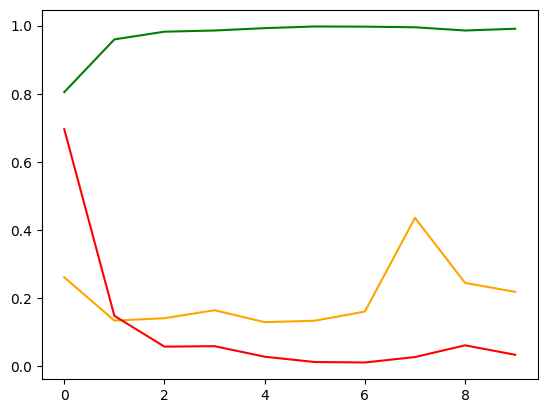

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**VGG16 with Average Pooling**

10 unit Dense Layer accuracy 96.40

In [ ]:
#from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def define_modelavg():
    # load model
    model_apple_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_apple_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_apple_avg.layers[-1].output)

    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_apple_avg = Model(inputs=model_apple_avg.inputs, outputs=output)
    return model_apple_avg


In [ ]:
model_apple_avg = define_modelavg()
model_apple_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_apple_avg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = model_apple_avg.fit(train_it, steps_per_epoch=epochsteps,
                    validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = model_apple_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
243/243 [==============================] - 19s 72ms/step - loss: 1.0812 - accuracy: 0.5703 - val_loss: 0.5344 - val_accuracy: 0.7972
Epoch 2/10
243/243 [==============================] - 16s 68ms/step - loss: 0.3055 - accuracy: 0.8936 - val_loss: 0.2313 - val_accuracy: 0.9223
Epoch 3/10
243/243 [==============================] - 18s 73ms/step - loss: 0.1575 - accuracy: 0.9471 - val_loss: 0.1728 - val_accuracy: 0.9434
Epoch 4/10
243/243 [==============================] - 16s 67ms/step - loss: 0.1087 - accuracy: 0.9642 - val_loss: 0.1443 - val_accuracy: 0.9511
Epoch 5/10
243/243 [==============================] - 17s 71ms/step - loss: 0.0803 - accuracy: 0.9745 - val_loss: 0.1288 - val_accuracy: 0.9568
Epoch 6/10
243/243 [==============================] - 16s 67ms/step - loss: 0.0672 - accuracy: 0.9793 - val_loss: 0.1111 - val_accuracy: 0.9614
Epoch 7/10
243/243 [==============================] - 17s 68ms/step - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.1063 - val_accuracy:

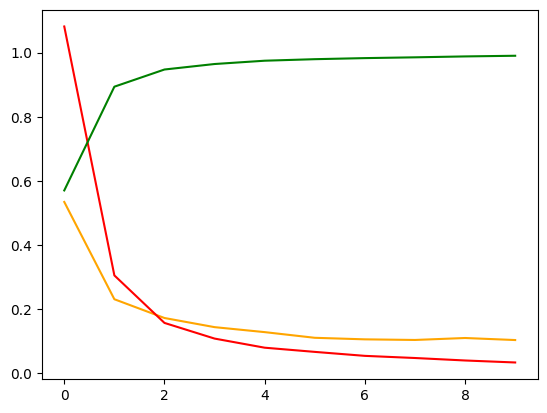

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**CNN with Flatten**

dense 16

ConvMax ConvMax ConvMax with Flatten accuracy 47.555

ConvMax ConvMax with Flatten accuracy 90.53

ConvMax ConvConvMax with Flatten accuracy 91.147

ConvConvMax(16,32) ConvMax(64) with Flatten accuracy 90.22

ConvConvMax(32,64) ConvMax(128) with Flatten accuracy 92.177

**ConvConvMax(16,32) ConvMax(64) ConvMax(128) with Flatten accuracy 96.40**

---
dense 17

ConvMax ConvMax with Flatten accuracy 91.50

---
dense 18

ConvConvMax(16,64) ConvMax(32) with Flatten accuracy 92.897

In [ ]:
def define_apple():
  apple = models.Sequential()
  apple = Sequential()

  apple.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  apple.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  apple.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.4))

  apple.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  apple.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.5))

  apple.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  apple.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  flat1 = Flatten()(apple.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(4, activation='softmax')(class1)
  apple = Model(inputs=apple.inputs, outputs=output)
  return apple

In [ ]:
apple = define_apple()
apple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
apple.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_43 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 conv2d_44 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 32, 32, 64)        0  

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = apple.fit(train_it, steps_per_epoch=epochsteps, validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = apple.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)


Epoch 1/10
243/243 [==============================] - 20s 71ms/step - loss: 2.0442 - accuracy: 0.6910 - val_loss: 0.4011 - val_accuracy: 0.8672
Epoch 2/10
243/243 [==============================] - 15s 60ms/step - loss: 0.2994 - accuracy: 0.9028 - val_loss: 0.2686 - val_accuracy: 0.9002
Epoch 3/10
243/243 [==============================] - 15s 60ms/step - loss: 0.1808 - accuracy: 0.9386 - val_loss: 0.2103 - val_accuracy: 0.9305
Epoch 4/10
243/243 [==============================] - 15s 60ms/step - loss: 0.1273 - accuracy: 0.9565 - val_loss: 0.1641 - val_accuracy: 0.9460
Epoch 5/10
243/243 [==============================] - 16s 65ms/step - loss: 0.1028 - accuracy: 0.9635 - val_loss: 0.2243 - val_accuracy: 0.9362
Epoch 6/10
243/243 [==============================] - 15s 63ms/step - loss: 0.0751 - accuracy: 0.9756 - val_loss: 0.1021 - val_accuracy: 0.9624
Epoch 7/10
243/243 [==============================] - 15s 60ms/step - loss: 0.0592 - accuracy: 0.9784 - val_loss: 0.1357 - val_accuracy:

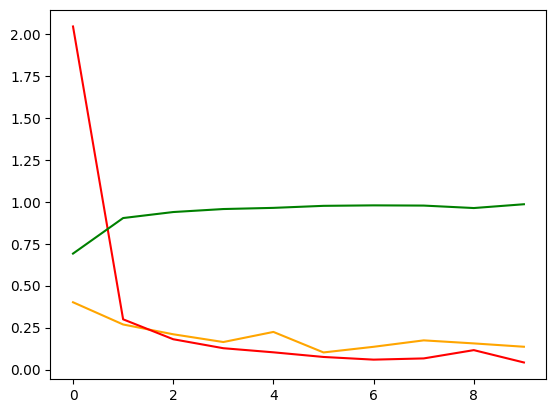

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')

**CNN with Average Pooling**

ConvMax ConvMax ConvMax with avgpool accuracy=99.02

In [ ]:
def define_apple_avg():
  apple_avg = models.Sequential()
  apple_avg = Sequential()

  apple_avg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu", input_shape=(128,128,3)))
  apple_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.4))

  apple_avg.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
  apple_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  #grape.add(Dropout(0.5))

  apple_avg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
  apple_avg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  avg1 = tf.keras.layers.GlobalAveragePooling2D()(apple_avg.layers[-1].output)
  class1 = Dense(16, activation='relu', kernel_initializer='he_uniform')(avg1)
  output = Dense(4, activation='softmax')(class1)
  apple_avg = Model(inputs=apple_avg.inputs, outputs=output)
  return apple_avg

In [ ]:
apple_avg = define_apple_avg()
apple_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
apple_avg.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_47 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                          

In [ ]:
epochsteps=len(train_it);epochs =10;valsteps=len(valid_it)
# fit model
history = apple_avg.fit(train_it, steps_per_epoch=epochsteps, validation_data=valid_it, validation_steps=valsteps, epochs=10, verbose=1)
_, acc = apple_avg.evaluate(valid_it, steps=valsteps, verbose=1)
print('accuracy',acc * 100.0)

Epoch 1/10
243/243 [==============================] - 17s 58ms/step - loss: 0.9410 - accuracy: 0.6836 - val_loss: 0.4815 - val_accuracy: 0.8281
Epoch 2/10
243/243 [==============================] - 14s 59ms/step - loss: 0.3857 - accuracy: 0.8566 - val_loss: 0.3385 - val_accuracy: 0.8801
Epoch 3/10
243/243 [==============================] - 14s 59ms/step - loss: 0.2658 - accuracy: 0.9071 - val_loss: 0.2400 - val_accuracy: 0.9202
Epoch 4/10
243/243 [==============================] - 14s 57ms/step - loss: 0.2028 - accuracy: 0.9328 - val_loss: 0.1706 - val_accuracy: 0.9408
Epoch 5/10
243/243 [==============================] - 14s 58ms/step - loss: 0.1548 - accuracy: 0.9471 - val_loss: 0.2473 - val_accuracy: 0.9135
Epoch 6/10
243/243 [==============================] - 17s 69ms/step - loss: 0.1446 - accuracy: 0.9487 - val_loss: 0.1501 - val_accuracy: 0.9496
Epoch 7/10
243/243 [==============================] - 14s 58ms/step - loss: 0.1127 - accuracy: 0.9601 - val_loss: 0.1250 - val_accuracy:

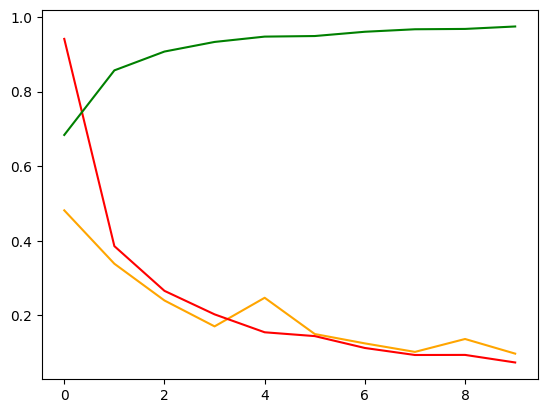

In [ ]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['accuracy'], color = 'green')